In [99]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math, datetime
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import style
import warnings
warnings.filterwarnings('ignore')
style.use("ggplot")

In [100]:
# Read the csv file
file = pd.read_csv("bitcoin_2.csv")
file

,Start,End,Open,High,Low,Close,Volume,Market Cap
0,2024-04-11,2024-04-12,70436.710000,71247.810000,69587.990000,70112.050000,1.634891e+11,1.386264e+12
1,2024-04-10,2024-04-11,69125.170000,71078.170000,67590.150000,70513.600000,1.588973e+11,1.361469e+12
2,2024-04-09,2024-04-10,71618.120000,71714.420000,68442.770000,69198.220000,1.324055e+11,1.380411e+12
3,2024-04-08,2024-04-09,69263.800000,72724.200000,69169.740000,71631.770000,5.315561e+10,1.398900e+12
4,2024-04-07,2024-04-08,68875.430000,70242.040000,68850.360000,69388.740000,3.866379e+10,1.365423e+12
...,...,...,...,...,...,...,...,...
361,2023-04-16,2023-04-17,30295.109927,30527.171373,30168.225141,30304.874581,2.347144e+10,5.863178e+11
362,2023-04-15,2023-04-16,30467.808300,30516.795700,30248.082815,30297.831144,3.682381e+10,5.875257e+11
363,2023-04-14,2023-04-15,30380.712600,30955.868600,30031.662600,30478.292400,4.807126e+10,5.915616e+11
364,2023-04-13,2023-04-14,29883.229500,30503.851600,29859.841700,30359.581200,4.289821e+10,5.843133e+11


In [101]:
file.drop("End", axis=1, inplace=True)
file

,Start,Open,High,Low,Close,Volume,Market Cap
0,2024-04-11,70436.710000,71247.810000,69587.990000,70112.050000,1.634891e+11,1.386264e+12
1,2024-04-10,69125.170000,71078.170000,67590.150000,70513.600000,1.588973e+11,1.361469e+12
2,2024-04-09,71618.120000,71714.420000,68442.770000,69198.220000,1.324055e+11,1.380411e+12
3,2024-04-08,69263.800000,72724.200000,69169.740000,71631.770000,5.315561e+10,1.398900e+12
4,2024-04-07,68875.430000,70242.040000,68850.360000,69388.740000,3.866379e+10,1.365423e+12
...,...,...,...,...,...,...,...
361,2023-04-16,30295.109927,30527.171373,30168.225141,30304.874581,2.347144e+10,5.863178e+11
362,2023-04-15,30467.808300,30516.795700,30248.082815,30297.831144,3.682381e+10,5.875257e+11
363,2023-04-14,30380.712600,30955.868600,30031.662600,30478.292400,4.807126e+10,5.915616e+11
364,2023-04-13,29883.229500,30503.851600,29859.841700,30359.581200,4.289821e+10,5.843133e+11


In [102]:
# Rename the column
file.rename(columns={"Start": "Date"}, inplace=True)
file

,Date,Open,High,Low,Close,Volume,Market Cap
0,2024-04-11,70436.710000,71247.810000,69587.990000,70112.050000,1.634891e+11,1.386264e+12
1,2024-04-10,69125.170000,71078.170000,67590.150000,70513.600000,1.588973e+11,1.361469e+12
2,2024-04-09,71618.120000,71714.420000,68442.770000,69198.220000,1.324055e+11,1.380411e+12
3,2024-04-08,69263.800000,72724.200000,69169.740000,71631.770000,5.315561e+10,1.398900e+12
4,2024-04-07,68875.430000,70242.040000,68850.360000,69388.740000,3.866379e+10,1.365423e+12
...,...,...,...,...,...,...,...
361,2023-04-16,30295.109927,30527.171373,30168.225141,30304.874581,2.347144e+10,5.863178e+11
362,2023-04-15,30467.808300,30516.795700,30248.082815,30297.831144,3.682381e+10,5.875257e+11
363,2023-04-14,30380.712600,30955.868600,30031.662600,30478.292400,4.807126e+10,5.915616e+11
364,2023-04-13,29883.229500,30503.851600,29859.841700,30359.581200,4.289821e+10,5.843133e+11


In [103]:
# Reorder the columns
new_df = file[["Date", "Open", "High", "Low", "Close", "Volume"]]


In [104]:
# Reorder the rows
new_df["Sn_no"] = np.arange(366)
new_df = new_df.sort_values("Sn_no", ascending=False)

In [105]:
new_df

,Date,Open,High,Low,Close,Volume,Sn_no
365,2023-04-12,30203.781800,30430.847500,29765.250100,29877.417736,4.441276e+10,365
364,2023-04-13,29883.229500,30503.851600,29859.841700,30359.581200,4.289821e+10,364
363,2023-04-14,30380.712600,30955.868600,30031.662600,30478.292400,4.807126e+10,363
362,2023-04-15,30467.808300,30516.795700,30248.082815,30297.831144,3.682381e+10,362
361,2023-04-16,30295.109927,30527.171373,30168.225141,30304.874581,2.347144e+10,361
...,...,...,...,...,...,...,...
4,2024-04-07,68875.430000,70242.040000,68850.360000,69388.740000,3.866379e+10,4
3,2024-04-08,69263.800000,72724.200000,69169.740000,71631.770000,5.315561e+10,3
2,2024-04-09,71618.120000,71714.420000,68442.770000,69198.220000,1.324055e+11,2
1,2024-04-10,69125.170000,71078.170000,67590.150000,70513.600000,1.588973e+11,1


In [106]:
# Convert the date column to datetime format
new_df['Date'] = pd.to_datetime(new_df['Date'])
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 365 to 0
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    366 non-null    datetime64[ns]
 1   Open    366 non-null    float64       
 2   High    366 non-null    float64       
 3   Low     366 non-null    float64       
 4   Close   366 non-null    float64       
 5   Volume  366 non-null    float64       
 6   Sn_no   366 non-null    int32         
dtypes: datetime64[ns](1), float64(5), int32(1)
memory usage: 21.4 KB


In [107]:
new_df['Date'] = new_df['Date'].dt.strftime('%Y-%m-%d')
new_df

,Date,Open,High,Low,Close,Volume,Sn_no
365,2023-04-12,30203.781800,30430.847500,29765.250100,29877.417736,4.441276e+10,365
364,2023-04-13,29883.229500,30503.851600,29859.841700,30359.581200,4.289821e+10,364
363,2023-04-14,30380.712600,30955.868600,30031.662600,30478.292400,4.807126e+10,363
362,2023-04-15,30467.808300,30516.795700,30248.082815,30297.831144,3.682381e+10,362
361,2023-04-16,30295.109927,30527.171373,30168.225141,30304.874581,2.347144e+10,361
...,...,...,...,...,...,...,...
4,2024-04-07,68875.430000,70242.040000,68850.360000,69388.740000,3.866379e+10,4
3,2024-04-08,69263.800000,72724.200000,69169.740000,71631.770000,5.315561e+10,3
2,2024-04-09,71618.120000,71714.420000,68442.770000,69198.220000,1.324055e+11,2
1,2024-04-10,69125.170000,71078.170000,67590.150000,70513.600000,1.588973e+11,1


In [108]:
# Set the 'Date' column as the index
data = new_df.drop(labels="Date", axis=1)
df_index = pd.Index(new_df["Date"])
real_data = data.set_index(df_index)

In [109]:
real_data

,Open,High,Low,Close,Volume,Sn_no
Date,,,,,,
2023-04-12,30203.781800,30430.847500,29765.250100,29877.417736,4.441276e+10,365
2023-04-13,29883.229500,30503.851600,29859.841700,30359.581200,4.289821e+10,364
2023-04-14,30380.712600,30955.868600,30031.662600,30478.292400,4.807126e+10,363
2023-04-15,30467.808300,30516.795700,30248.082815,30297.831144,3.682381e+10,362
2023-04-16,30295.109927,30527.171373,30168.225141,30304.874581,2.347144e+10,361
...,...,...,...,...,...,...
2024-04-07,68875.430000,70242.040000,68850.360000,69388.740000,3.866379e+10,4
2024-04-08,69263.800000,72724.200000,69169.740000,71631.770000,5.315561e+10,3
2024-04-09,71618.120000,71714.420000,68442.770000,69198.220000,1.324055e+11,2


In [110]:
# Create new columns for the percentage changes in each variable
real_data["HL_pct"] = ((real_data["High"] - real_data["Low"]) / real_data["Low"]) * 100
real_data["PCT_change"] = ((real_data["Open"] - real_data["Close"]) / real_data["Close"]) * 100
df = real_data[["Close", "Volume", "HL_pct", "PCT_change"]]
df

,Close,Volume,HL_pct,PCT_change
Date,,,,
2023-04-12,29877.417736,4.441276e+10,2.236156,1.092344
2023-04-13,30359.581200,4.289821e+10,2.156776,-1.569033
2023-04-14,30478.292400,4.807126e+10,3.077439,-0.320162
2023-04-15,30297.831144,3.682381e+10,0.888363,0.561021
2023-04-16,30304.874581,2.347144e+10,1.189816,-0.032221
...,...,...,...,...
2024-04-07,69388.740000,3.866379e+10,2.021311,-0.739760
2024-04-08,71631.770000,5.315561e+10,5.138750,-3.305754
2024-04-09,69198.220000,1.324055e+11,4.780125,3.497055


In [111]:
# Set the forecast column
forecast_col = df["Close"]
forecast_out = int(math.ceil(0.01*len(df)))
forecast_out

4

In [112]:
# Create the label column
df["label"] = df["Close"].shift(-forecast_out)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 2023-04-12 to 2024-04-11
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Close       366 non-null    float64
 1   Volume      366 non-null    float64
 2   HL_pct      366 non-null    float64
 3   PCT_change  366 non-null    float64
 4   label       362 non-null    float64
dtypes: float64(5)
memory usage: 17.2+ KB


In [113]:
# Create the feature set
X = np.array(df.drop(labels="label", axis=1))
X = preprocessing.scale(X) # Scale the data to make it easier to work with
X = X[:-forecast_out] # Drop the last forecast_out rows
X_lately = X[-forecast_out: ]
df.dropna(inplace=True)
y = np.array(df["label"]) # Create the label array
print(len(X),len(y))

362 362


In [114]:
# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression()
clf.fit(X_train,y_train)
accuracy = clf.score(X_test,y_test)
forecast_set = clf.predict(X_lately)
print(forecast_set, accuracy, forecast_out)
df["Forecast"] = np.nan 

[70052.54345454 69522.12287401 70566.36135333 71098.3008886 ] 0.971477178789198 4


In [115]:
# Get the last date
last_date = df.iloc[-1].name
element = datetime.datetime.strptime(last_date,"%Y-%m-%d") # Convert the last date to a datetime object

In [116]:
# Add the forecast to the dataframe
last_unix = datetime.datetime.timestamp(element)
one_day = 86400 # Seconds in a day
next_unix = last_unix + one_day # Add one day to the last date

In [117]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

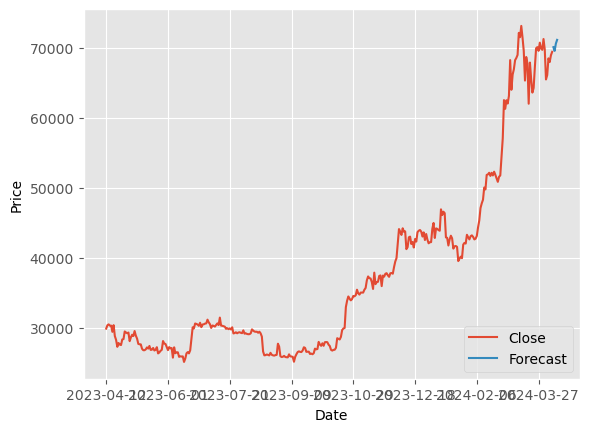

<Figure size 5000x5000 with 0 Axes>

In [118]:
# Plot the data
df["Close"].plot()
df["Forecast"].plot()
plt.legend(loc=4)
plt.xlabel("Date")
plt.ylabel("Price")
plt.figure(figsize=(50,50), dpi=100)
plt.show()
